## CART (Classification and Regression Trees)
## Random Forest

Here we will analyzes again the Ames Housing Data, this time using first a single decision tree
and later a Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

from sklearn.cross_validation import train_test_split

#This is for displaying the tree (we shouldn't need these now)
#!pip install pydotplus
#!pip install GraphViz
#import pydotplus as pydot
#from IPython.display import Image
from sklearn.externals.six import StringIO
#import graphviz

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#datafile = "../02-regression_scrape/data/Ames_Housing_Data.tsv"
#datafile = "../data/Ames_Housing_Data.tsv"
datafile = "movies.csv"

In [88]:
df = pd.read_csv(datafile)

In [89]:
## Get rid of Unnamed first column, generated when creating the csv from the scraped data, and drop null records
df.info()
df = df.loc[:,'Title':].dropna()
df.head()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
Unnamed: 0         1100 non-null int64
Title              1099 non-null object
Rating             1100 non-null object
Genre              1100 non-null object
Director           992 non-null object
Producer           915 non-null object
Foreign Gross      1085 non-null float64
Opening Weekend    1100 non-null int64
Widest Release     1100 non-null int64
Budget             908 non-null float64
Release Date       1100 non-null object
Domestic Gross     1100 non-null int64
Runtime            1100 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 111.8+ KB


737

In [90]:
# Preprocessing as we did last tiem

# df = df.loc[df['Gr Liv Area']<=4000,:]
# df= df.loc[:,['Lot Area','Overall Qual',
#        'Overall Cond', 'Year Built', 'Year Remod/Add',
#         'Gr Liv Area', 
#         'Full Bath', 'Bedroom AbvGr',
#         'Fireplaces', 'Garage Cars','SalePrice']]
# df = df.fillna(0)


In [91]:
df.head()

,Title,Rating,Genre,Director,Producer,Foreign Gross,Opening Weekend,Widest Release,Budget,Release Date,Domestic Gross,Runtime
0,Pirates of the Caribbean: Dead Man's Chest,PG-13,Period Adventure,Gore Verbinski,Jerry Bruckheimer,642863913.0,135634554,4133,225000000.0,2006-07-07,423315812,151
2,Cars,G,Animation,John Lasseter,Darla K. Anderson,218133298.0,60119509,3988,120000000.0,2006-06-09,244082982,116
3,X-Men: The Last Stand,PG-13,Action / Adventure,Brett Ratner,Avi Arad,224997093.0,102750665,3714,210000000.0,2006-05-26,234362462,104
4,The Da Vinci Code,PG-13,Thriller,Ron Howard,Brian Grazer,540703713.0,77073388,3757,125000000.0,2006-05-19,217536138,149
5,Superman Returns,PG-13,Action / Adventure,Bryan Singer,Gilbert Adler,191000000.0,52535096,4065,270000000.0,2006-06-28,200081192,154


In [92]:
df.columns

Index(['Title', 'Rating', 'Genre', 'Director', 'Producer', 'Foreign Gross',
       'Opening Weekend', 'Widest Release', 'Budget', 'Release Date',
       'Domestic Gross', 'Runtime'],
      dtype='object')

In [93]:
# feature_columns = ['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
#        'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
#        'Fireplaces', 'Garage Cars']

# y = df.loc[:,"SalePrice"]
# X = df.loc[:,feature_columns]
feature_columns = ['Foreign Gross', 
                    'Opening Weekend', 
                    'Widest Release', 
                    'Domestic Gross', 
                    'Runtime']
X=df.loc[:,feature_columns]

y=df['Budget']

In [94]:
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [95]:
## To start, we will build a single tree
from sklearn import tree

# Set some parameters
#dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=4)
dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=6, min_samples_leaf=8)

# Fit the model to some training data
dtrmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=8, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [96]:
dtrmodel.tree_

In [97]:
# Export the structure of the tree to a file

tree.export_graphviz(dtrmodel, out_file='tree.dot',feature_names = X_train.columns)

In [98]:
# Look at the file (using ! for a command line access)

!head tree.dot

digraph Tree {
node [shape=box] ;
0 [label="Widest Release <= 3441.5\nmse = 3.60353378791e+15\nsamples = 515\nvalue = 72833427.1845"] ;
1 [label="Foreign Gross <= 113110280.0\nmse = 1.0131283328e+15\nsamples = 335\nvalue = 41877358.209"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Foreign Gross <= 32283888.0\nmse = 5.44968299264e+14\nsamples = 278\nvalue = 34961924.4604"] ;
1 -> 2 ;
3 [label="Runtime <= 111.5\nmse = 3.20236904472e+14\nsamples = 111\nvalue = 25353153.1532"] ;
2 -> 3 ;
4 [label="Domestic Gross <= 72896312.0\nmse = 1.57819680424e+14\nsamples = 74\nvalue = 20239189.1892"] ;


In [99]:
# Now:
# 1) Open a new browser tab and go to http://webgraphviz.com 
# 2) Open the tree.dot file as a text file
# 3) Copy and Paste the text of the file into the webpage

In [100]:
# Poke around inside the structure of the tree object
# Specifically, look at the "feature" and "threshold"
# These are indexed by the "node" of the tree.  First element is the root.
# Usually counts "depth first"

list(zip(dtrmodel.tree_.feature,dtrmodel.tree_.threshold))[:10]



[(2, 3441.5),
 (0, 113110280.0),
 (0, 32283888.0),
 (4, 111.5),
 (3, 72896312.0),
 (0, 16725420.0),
 (-2, -2.0),
 (-2, -2.0),
 (-2, -2.0),
 (2, 2468.0)]

In [101]:
# Look at "children_left" and "children_right"

list(zip(dtrmodel.tree_.children_left,dtrmodel.tree_.children_right))[:10]



[(1, 38),
 (2, 27),
 (3, 14),
 (4, 9),
 (5, 8),
 (6, 7),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (10, 11)]

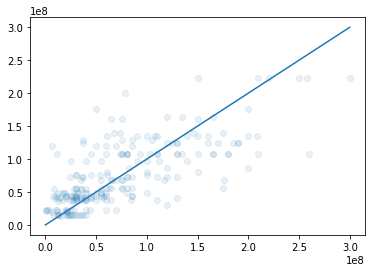

In [102]:
# Now let's predict on the test set and plot pred vs actual

tree_pred_test = dtrmodel.predict(X_test)
plt.scatter(y_test, tree_pred_test,alpha=.1)
plt.plot(np.linspace(0,300000000,1000),np.linspace(0,300000000,1000));


## Comprehension question
Why do we see these horizontal "bands" in the predicted vs actual plot?

In [103]:
# Root Mean Square Error (compared to 34427 for linear regression without OQ2, 29882 with OQ2)
np.sqrt(np.mean((tree_pred_test - y_test)**2))

41288722.626741916

In [104]:
# Not bad for a single tree!  Let's try a Random Forest

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
# Initialize the model, then fit it on the training data
rfmodel1 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=5, max_features=4, n_jobs=-1)
rfmodel1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [107]:
# Use the trained model to predict the results on the test set

rf1_test_pred = rfmodel1.predict(X_test)

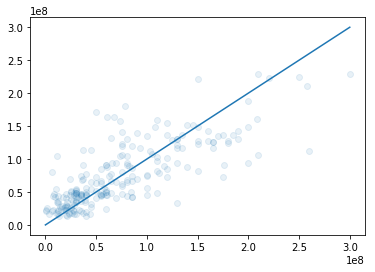

In [108]:
#Plot actual vs predicted
plt.scatter(y_test, rf1_test_pred,alpha=.1)
plt.plot(np.linspace(0,300000000,1000),np.linspace(0,300000000,1000))



In [109]:
# Root Mean Square Error (compared to 34427 for linear regression without OQ2, 29882 with OQ2)
np.sqrt(np.mean((rf1_test_pred - y_test)**2))

36756198.442045175

In [110]:
## Even better!

## now create your own Random Forest model (rfmodel2), choose some new parameters
## e.g. max_features, min_leaf_size, min_sample_size

In [111]:
rfmodel2=RandomForestRegressor(n_estimators = 1000, min_samples_leaf=1,  n_jobs=-1, max_features=4, min_impurity_split=300000) #Your parameters inside the parentheses
rfmodel2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=300000,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [112]:
rf2_test_pred = rfmodel2.predict(X_test)

In [113]:
np.sqrt(np.mean((rf2_test_pred - y_test)**2))

36993275.137460753

In [130]:
rfmodel2.score(X_test, y_test)

0.6031680365926817

In [114]:
rfmodel2.max_features


4

In [115]:
rfmodel3=RandomForestRegressor(n_estimators = 600, min_samples_leaf=1,  n_jobs=-1, max_features='sqrt') #Your parameters inside the parentheses
rfmodel3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=600, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [116]:
rf3_test_pred = rfmodel3.predict(X_test)

In [117]:
np.sqrt(np.mean((rf3_test_pred - y_test)**2))

36854170.673696332

In [131]:
rfmodel3.score(X_test, y_test)

0.6061468110825049

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

In [119]:
# for following, max_depth most important, then n_estimators and learning_rate are trade-off
# then subsample for regularization
gbmodel1 = GradientBoostingRegressor(n_estimators=500, learning_rate=.05, max_depth=4, subsample=.9)

In [120]:
gbmodel1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=0.9, verbose=0,
             warm_start=False)

In [121]:
# try estimaotirs=2000, learning_rate=.01, max_depth=5
# try other values to get better root mean square error
y_pred_gb1 = gbmodel1.predict(X_test)
np.sqrt(np.mean((y_pred_gb1 - y_test)**2))

38276753.472556487

In [129]:
gbmodel1.score(X_test, y_test)

0.57515425721594493

In [122]:
list(zip(X_train.columns, gbmodel1.feature_importances_))

[('Foreign Gross', 0.22314233885478771),
 ('Opening Weekend', 0.20571370009456122),
 ('Widest Release', 0.23257685286545357),
 ('Domestic Gross', 0.23397331614711345),
 ('Runtime', 0.10459379203808465)]

In [123]:
# Let's add genres and ratings, the categorical predictors
# Pick just the most frequent genres

df['Genre'].unique()
#df['Rating'].unique()

mincount = 20 # keep movies for genres that have at least mincount titles

gdf = df.groupby('Genre').count().sort_values('Title',ascending=False)['Title']
#list(zip(gdf[gdf>mincount].index, gdf[gdf>mincount]))
grows = df['Genre'].isin(gdf[gdf > mincount].index)
df2 = df[grows]


In [124]:
# Map the ratings and genres to integers so they can be processed numerically
rdict = {'G':0, 'PG':1, 'PG-13':2, 'R':3}
gdict = {'Animation':5, 'Action / Adventure':1, 'Thriller':7, 'Action':2, 'Drama':6,
       'Comedy':4, 'Horror':8, 'Sci-Fi Action':0, 'Action Comedy':3}

In [125]:
df2['GenreInd'] = df2['Genre'].map(lambda x: gdict[x])
df2['RatingInd'] = df2['Rating'].map(lambda x: rdict[x])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [128]:
#list(zip(df2['Rating'],df2['RatingInd']))

In [127]:
df2.columns
Xd = df2.loc[:,['Foreign Gross', 'Opening Weekend', 'Widest Release',
       'Domestic Gross', 'Runtime', 'GenreInd', 'RatingInd']]
yd = df2['Budget']
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.3,random_state=42)

In [132]:
# Let's try a RandomForest including the categorical predictors
rfmodel4=RandomForestRegressor(n_estimators = 1000, min_samples_leaf=1,  n_jobs=-1, max_features=4, min_impurity_split=300000) #Your parameters inside the parentheses
rfmodel4.fit(Xd_train,yd_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=300000,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [133]:
rfmodel4.score(Xd_test, yd_test)

0.64671027537384684

In [135]:
# Let's try a gradient boost model too
gbmodel2 = GradientBoostingRegressor(n_estimators=500, learning_rate=.05, max_depth=4, subsample=.9)
gbmodel2.fit(Xd_train, yd_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=0.9, verbose=0,
             warm_start=False)

In [136]:
gbmodel2.score(Xd_test, yd_test)

0.60424723851206963